# Projet : Modélisation prédictive pour l'évaluation du rique de crédit bancaire 
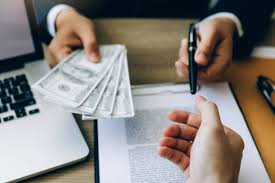




# Contexte 

La Banque Nationale de Développement Économique (BNDE) est confrontée à une augmentation préoccupante des défauts de paiement sur son portefeuille de prêts personnels et professionnels. Au cours des deux dernières années, le taux de défaillance est passé de 3,2% à 5,7%, entraînant des pertes financières significatives et une détérioration de la qualité globale du portefeuille.

En France selon Banque de France et l'OSMP(Observatoire de la Sécurité des Moyens de Paiement)l'inscriptions au FICP (Fichier des Incidents de remboursement des Crédits aux Particuliers), plus de 756 000 nouvelles inscriptions entre janvier et octobre 2024, en hausse de 3,7 % par rapport à la même période en 2023. Parmi celles-ci, plus de 687 000 sont dues à des incidents de paiement, et environ 70 300 à des situations de surendettement.  

Évaluer le risque de crédit est donc crucial pour les institutions bancaires afin de décider si un prêt doit être accordé.



# Problématique

Quels types de clients présentent un risque de crédit élevé?
Comment développer un modèle prédictif robuste permettant d'identifier avec précision les clients présentant un risque de crédit élevé, afin de réduire le taux de défaut de paiement?


Ce projet permet de créer un modèle de classification qui prédit la probabilité qu'un client représente un risque de crédit élevé

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/imec.eu.com/Downloads/credit_risk_dataset.csv")
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df = data.copy()

# Exploration des données

In [4]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

# Description des variables

. person_age: L'âge de l'emprunteur en années.

. person_income: Le revenu annuel de l'emprunteur, probablement en dollars ou en euros.

. person_home_ownership: Le statut de propriété du logement de l'emprunteur (par exemple, propriétaire, locataire, hypothèque,etc.).

. loan_intent: L'objectif ou le motif du prêt (par exemple, achat de voiture, amélioration de maison, éducation, consolidation de dette, payement frais médicaux,etc.).

. loan_grade: La note attribuée au prêt par l'institution financière, généralement une classification du risque de crédit (comme A, B, C, D, etc., où A représente le risque le plus faible).

. loan_amnt: Le montant du prêt demandé ou accordé.

. loan_status: Le statut actuel du prêt, une variable binaire indiquant si le prêt est en cours de remboursement normal ou en défaut.

. loan_percent_income: Le pourcentage que représente le montant du prêt par rapport au revenu annuel de l'emprunteur.

. cb_person_default_on_file: Indique si l'emprunteur a déjà eu un défaut de paiement dans son historique de crédit (oui/non).

. cb_person_cred_hist_length: La durée de l'historique de crédit de l'emprunteur en années.

. person_emp_length: La durée d'emploi de l'emprunteur chez son employeur actuel, probablement en années.

. loan_int_rate: Le taux d'intérêt du prêt, généralement exprimé en pourcentage annuel.

In [5]:
pd.set_option('display.max_row', 12)


In [6]:
df.dtypes.value_counts()

int64      5
object     4
float64    3
dtype: int64

<Axes: >

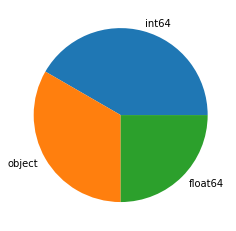

In [7]:
df.dtypes.value_counts().plot.pie()

<Axes: >

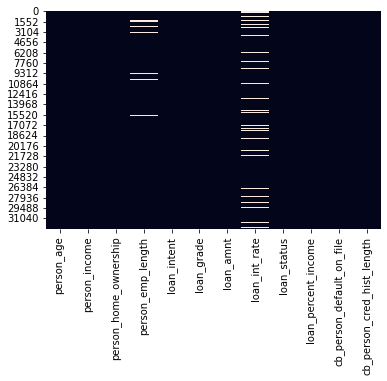

In [8]:
sns.heatmap(df.isna(), cbar=False)

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
person_emp_length             0.027470
loan_int_rate                 0.095639
dtype: float64

In [10]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [11]:
df['loan_status'].value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/8x/5glvyl

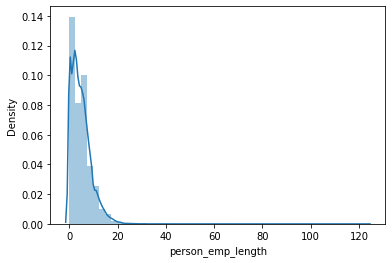

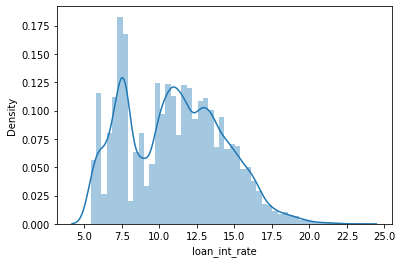

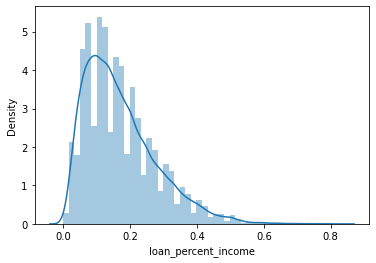

In [12]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/103336923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/103336923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/8x/5glvyl75

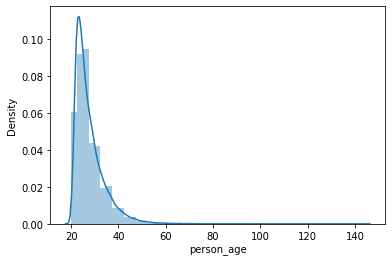

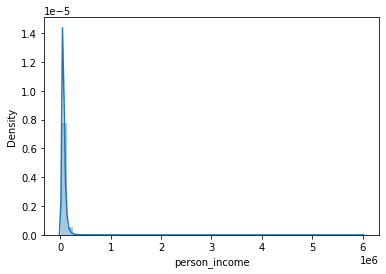

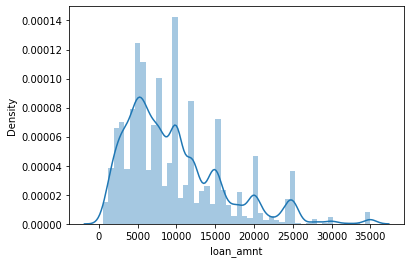

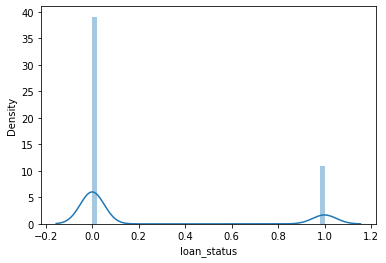

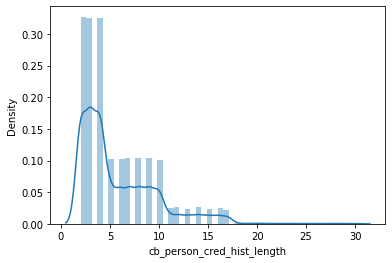

In [13]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

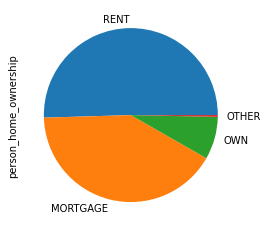

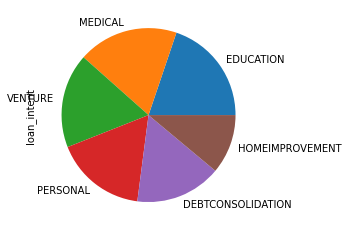

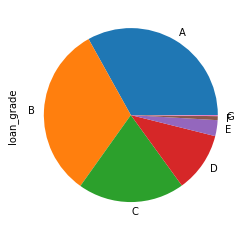

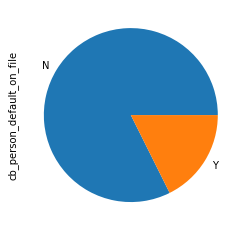

In [14]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

# Création de deux  sous ensembles 
Le statut actuel du prêt, une variable binaire indiquant si le prêt est en cours de remboursement normal ou en défaut. 
Notons bad le remboursement en défaut et good le remboursement normal

In [15]:
good_df = df[df['loan_status'] == 1]
bad_df = df[df['loan_status'] == 0]

Divisons les variables par leur catégories : 
    
1/ Variables quantitatives (valeurs numériques mesurables):

- person_age (âge de la personne)

- person_income (revenu de la personne)

- loan_amnt (montant du prêt)

- loan_percent_income (pourcentage du prêt par rapport au revenu)

- cb_person_cred_hist_length (durée de l'historique de crédit)
                              
- person_emp_length (durée d'emploi)
                     
- loan_int_rate (taux d'intérêt du prêt)

2/ Variables qualitatives (catégories ou attributs):

- person_home_ownership (type de propriété: location, propriétaire, etc.)
                 
- loan_intent (objectif du prêt)
                 
- loan_grade (notation du prêt)
                 
- loan_status (statut du prêt: remboursé ou en défaut)
                 
- cb_person_default_on_file (antécédent de défaut: oui/non)

In [16]:
quant_var = ['person_age','person_income','loan_amnt','loan_percent_income','cb_person_cred_hist_length',
             'person_emp_length', 'loan_int_rate']
qual_var = ['person_home_ownership','loan_intent','loan_grade','loan_status','cb_person_default_on_file']

# Création des ensembles formes, intensité, entropy et corrélation 

/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/412995253.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(good_df[col], label='good')
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/412995253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bad_df[col], l

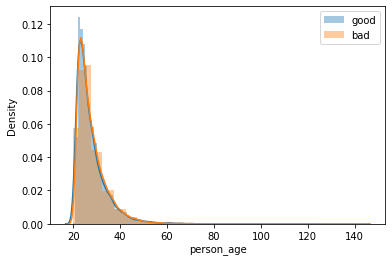

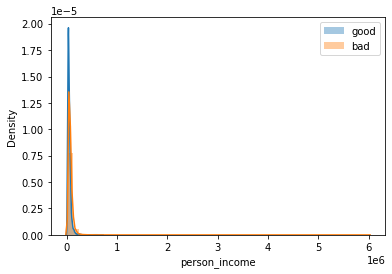

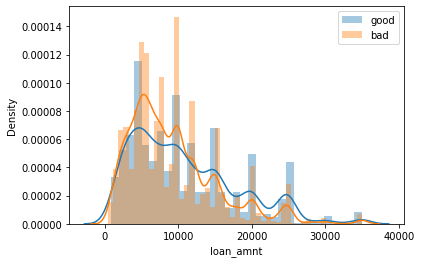

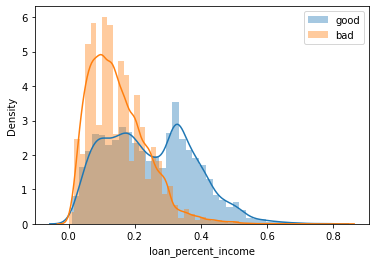

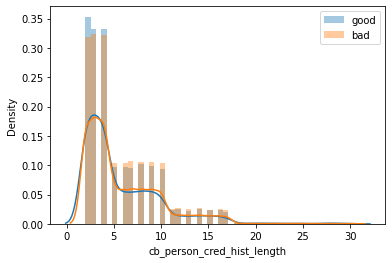

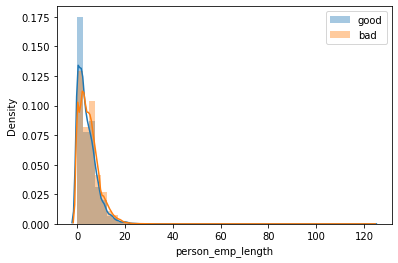

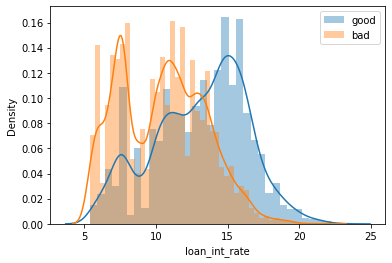

In [17]:
for col in quant_var:
    plt.figure()
    sns.distplot(good_df[col], label='good')
    sns.distplot(bad_df[col], label='bad')
    plt.legend()
    

<function matplotlib.pyplot.show(close=None, block=None)>

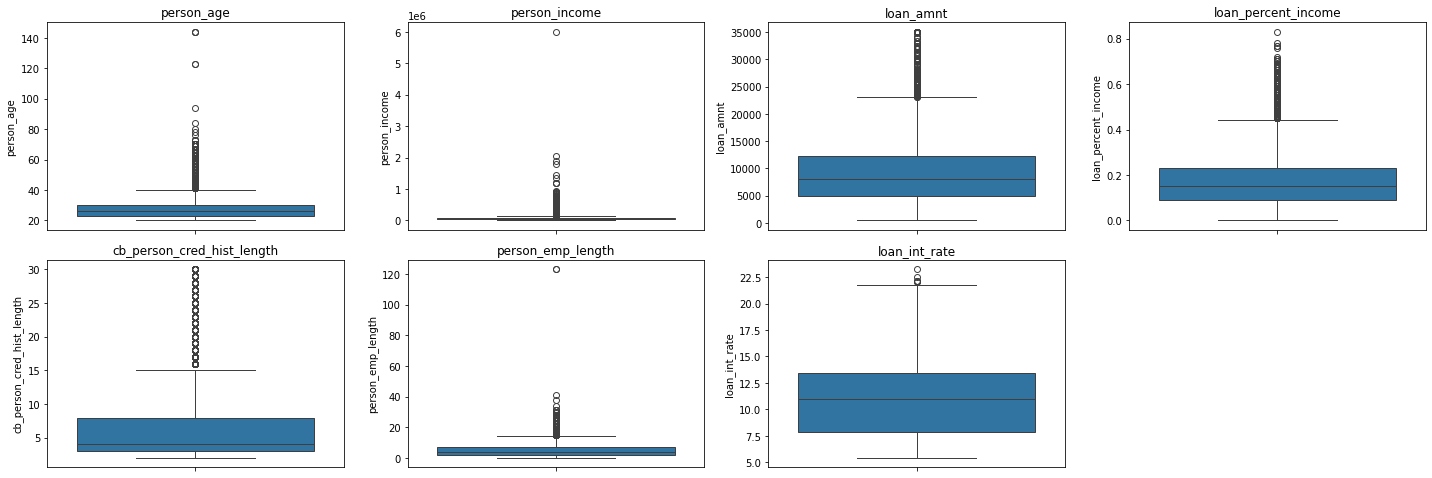

In [19]:
#Création d' une figure
plt.figure(figsize = (20,10))

#Création d'un boxplot pour chaque variables quantitative
for i, var in enumerate(quant_var):
    plt.subplot(3,4,i+1)
    sns.boxplot(data=df,y=var)
    plt.title(var)
    
#Affichage de la figure
plt.tight_layout()
plt.show

In [20]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [21]:
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)

In [22]:
duplicate_count = df.duplicated().sum()
duplicate_count

165

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [25]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)


person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

# Analyse bivarié
Nous allons faire une analyse entre les variables et la cible 

/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/2655168742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/2655168742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/2655168742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
/var/folders/8x/

<function matplotlib.pyplot.show(close=None, block=None)>

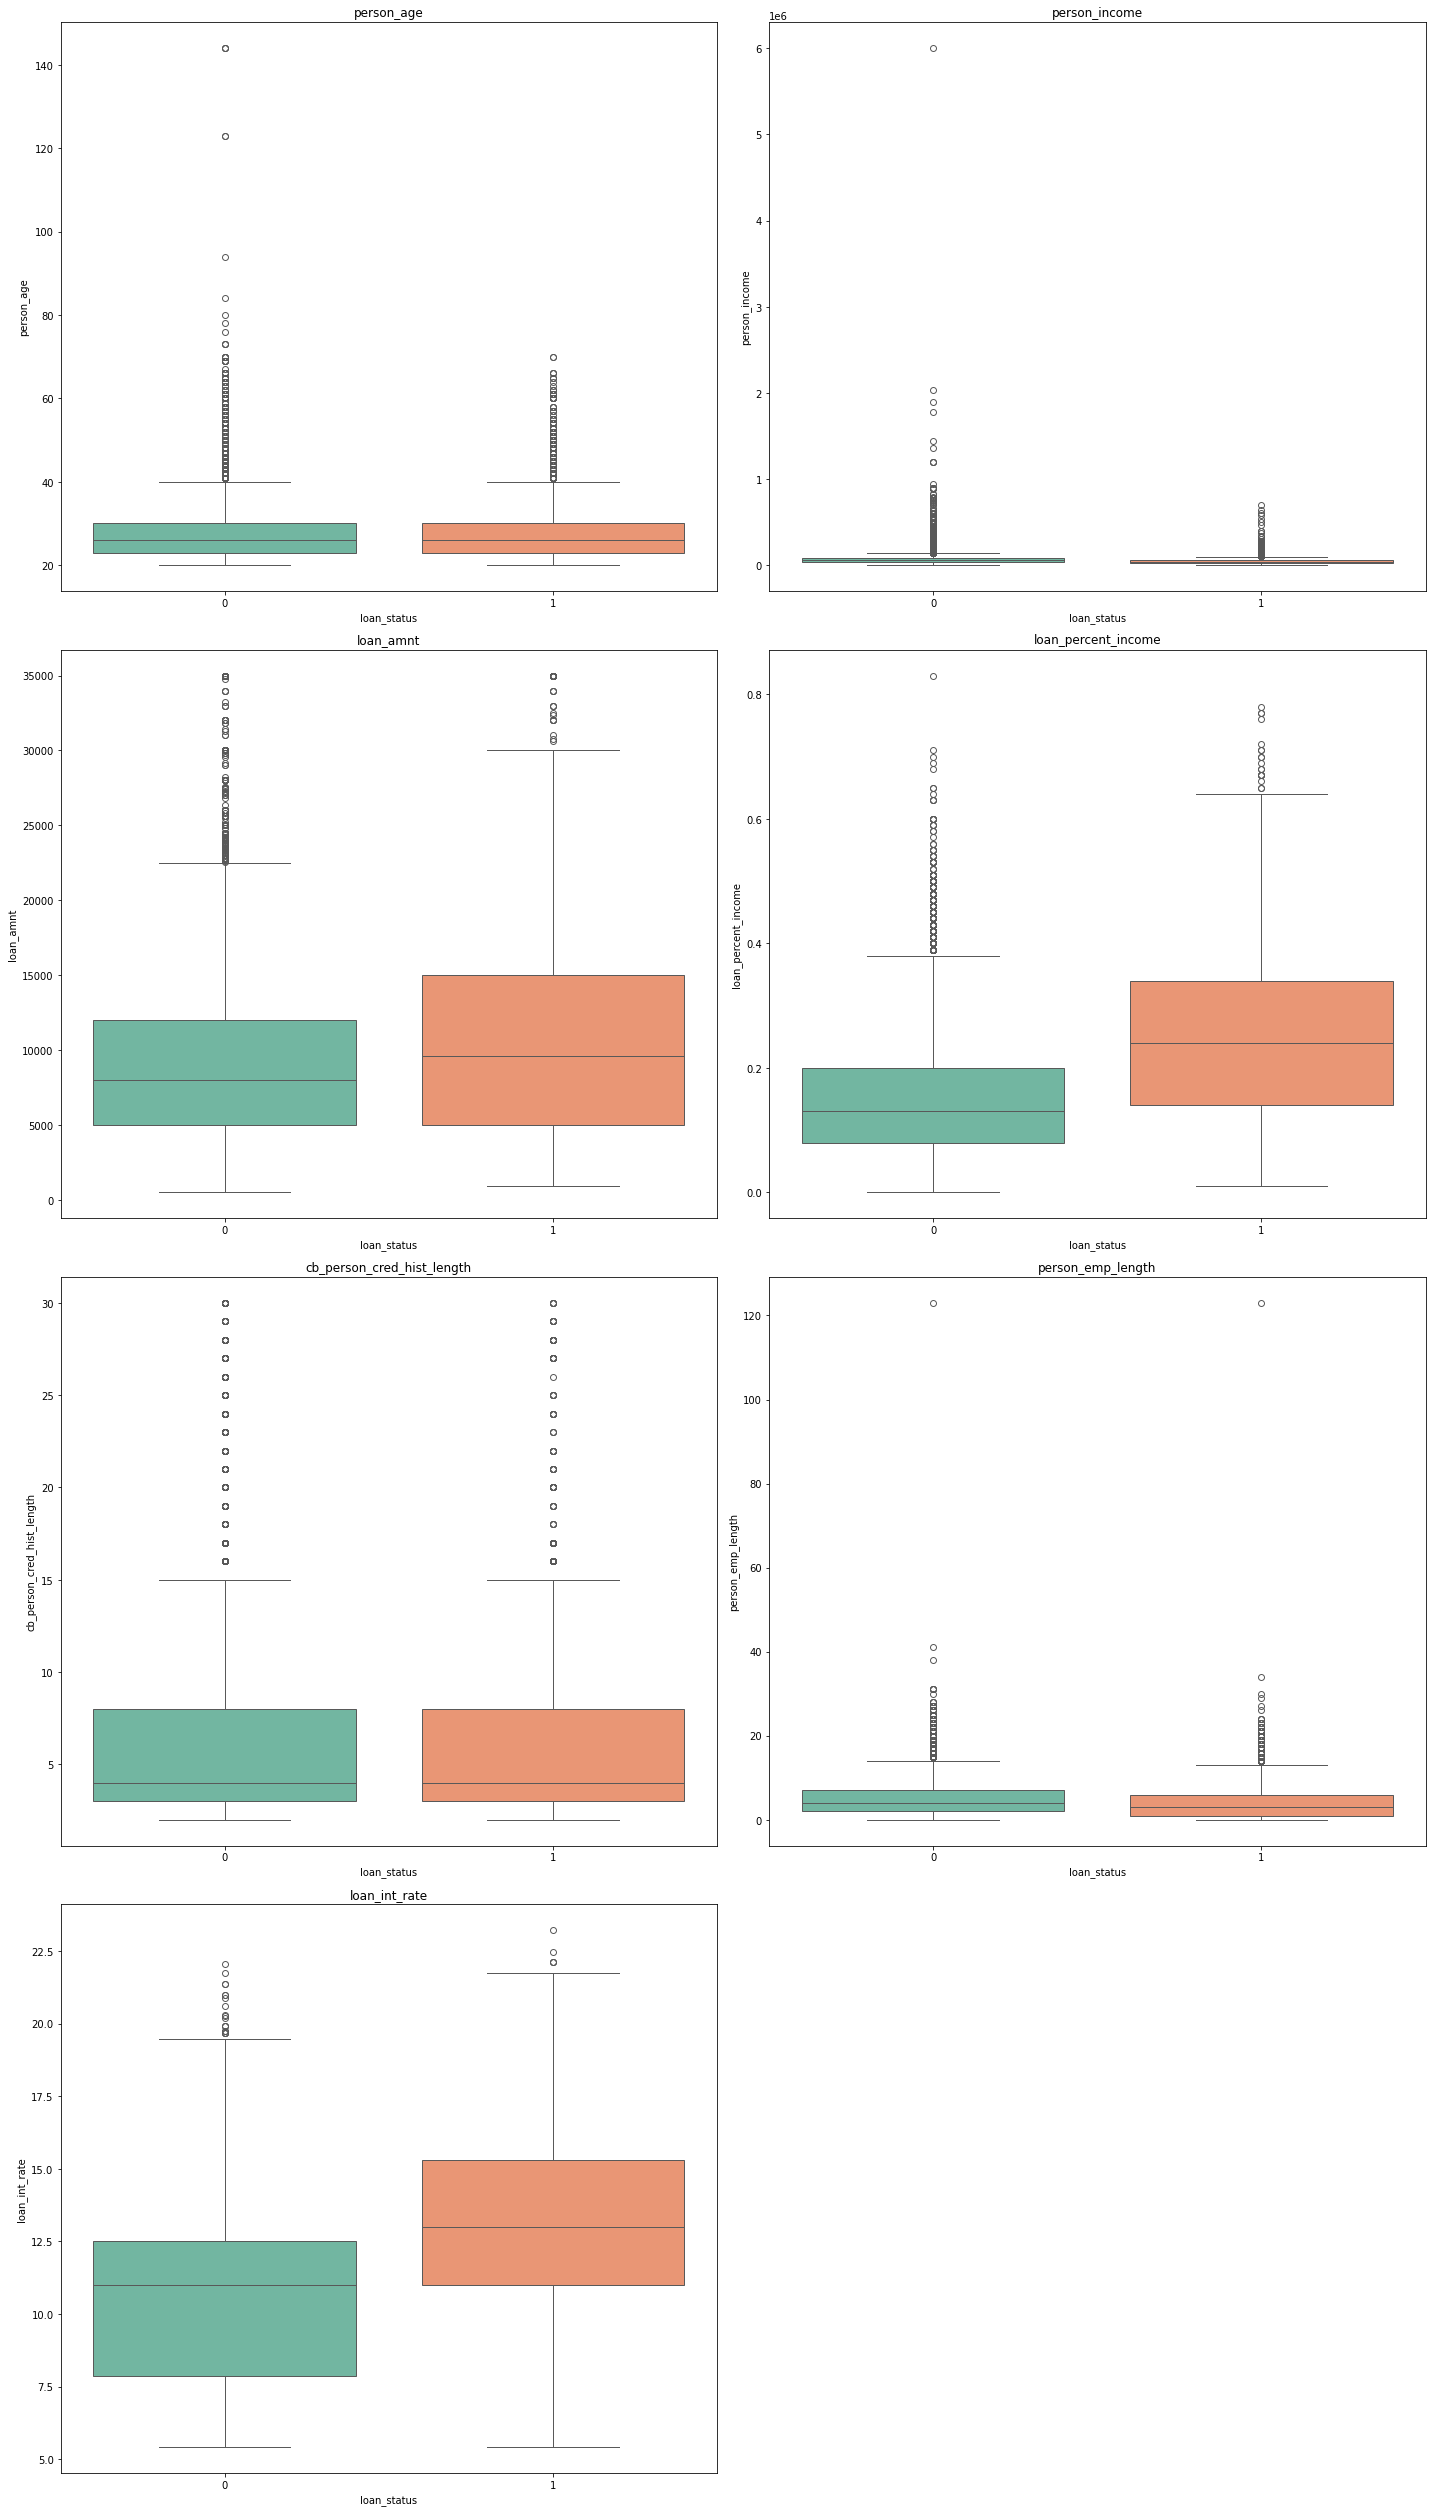

In [26]:
#Créer une figure 
plt.figure(figsize=(20,35))

#Création d'un boxplot pour chque variable quantitative
for i, var in enumerate(quant_var):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
    plt.title(var)
    
plt.tight_layout()
plt.show

In [27]:
from scipy.stats import kruskal

# Calcul des statistiques de test de Kruskal-Wallis et les p-valeurs pour chaque variable
test_stats = []
p_values = []
variables = []

for var in quant_var:
    # Extraire les valeurs de la variable spécifique pour chaque groupe
    good_values = good_df[var].dropna().values
    bad_values = bad_df[var].dropna().values
    
    try:
        # Appliquer le test de Kruskal-Wallis aux valeurs de cette variable
        test_stat, p_value = kruskal(good_values, bad_values)
        
        # Stocker les résultats
        variables.append(var)
        test_stats.append(test_stat)
        p_values.append(p_value)
    except Exception as e:
        print(f"Erreur lors du test pour {var}: {e}")
    
# Créer le DataFrame de résultats
ranking_df = pd.DataFrame({'Variable': variables, 'Test Statistic': test_stats, 'p-value': p_values})
ranking_df.sort_values('Test Statistic', ascending=False, inplace=True)
print(ranking_df)

                     Variable  Test Statistic       p-value
3         loan_percent_income     3255.684952  0.000000e+00
6               loan_int_rate     3018.286718  0.000000e+00
1               person_income     2412.717319  0.000000e+00
5           person_emp_length      301.565953  1.501778e-67
2                   loan_amnt      230.057310  5.792210e-52
0                  person_age       36.245067  1.739999e-09
4  cb_person_cred_hist_length       18.422104  1.769929e-05


In [28]:
from scipy.stats import kruskal
import numpy as np
import pandas as pd

# Supposons que good_df et bad_df sont vos DataFrames
test_stats = []
p_values = []
results = []

for var in quant_var:
    # Extraire les valeurs numériques spécifiques à chaque variable
    good_values = good_df[var].dropna().values  # Important: supprimer les valeurs NaN
    bad_values = bad_df[var].dropna().values
    
    try:
        # Appliquer le test de Kruskal-Wallis
        test_stat, p_value = kruskal(good_values, bad_values)
        
        # Stocker les résultats
        test_stats.append(test_stat)
        p_values.append(p_value)
        results.append({
            'Variable': var,
            'Test_Statistic': test_stat,
            'P_Value': p_value,
            'Significant': p_value < 0.05
        })
    except Exception as e:
        print(f"Erreur lors du test pour {var}: {e}")

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(results)
print(results_df)

                     Variable  Test_Statistic       P_Value  Significant
0                  person_age       36.245067  1.739999e-09         True
1               person_income     2412.717319  0.000000e+00         True
2                   loan_amnt      230.057310  5.792210e-52         True
3         loan_percent_income     3255.684952  0.000000e+00         True
4  cb_person_cred_hist_length       18.422104  1.769929e-05         True
5           person_emp_length      301.565953  1.501778e-67         True
6               loan_int_rate     3018.286718  0.000000e+00         True


/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_16368/349962241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_df, x='Variable', y='Test Statistic', palette='Set2')


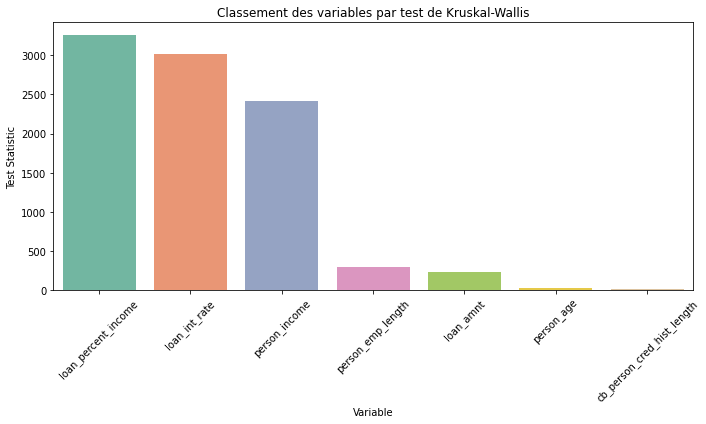

In [29]:
# Créer un graphique de classement
plt.figure(figsize=(10, 6))
sns.barplot(data=ranking_df, x='Variable', y='Test Statistic', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Test Statistic')
plt.title('Classement des variables par test de Kruskal-Wallis')
plt.tight_layout()
plt.show()

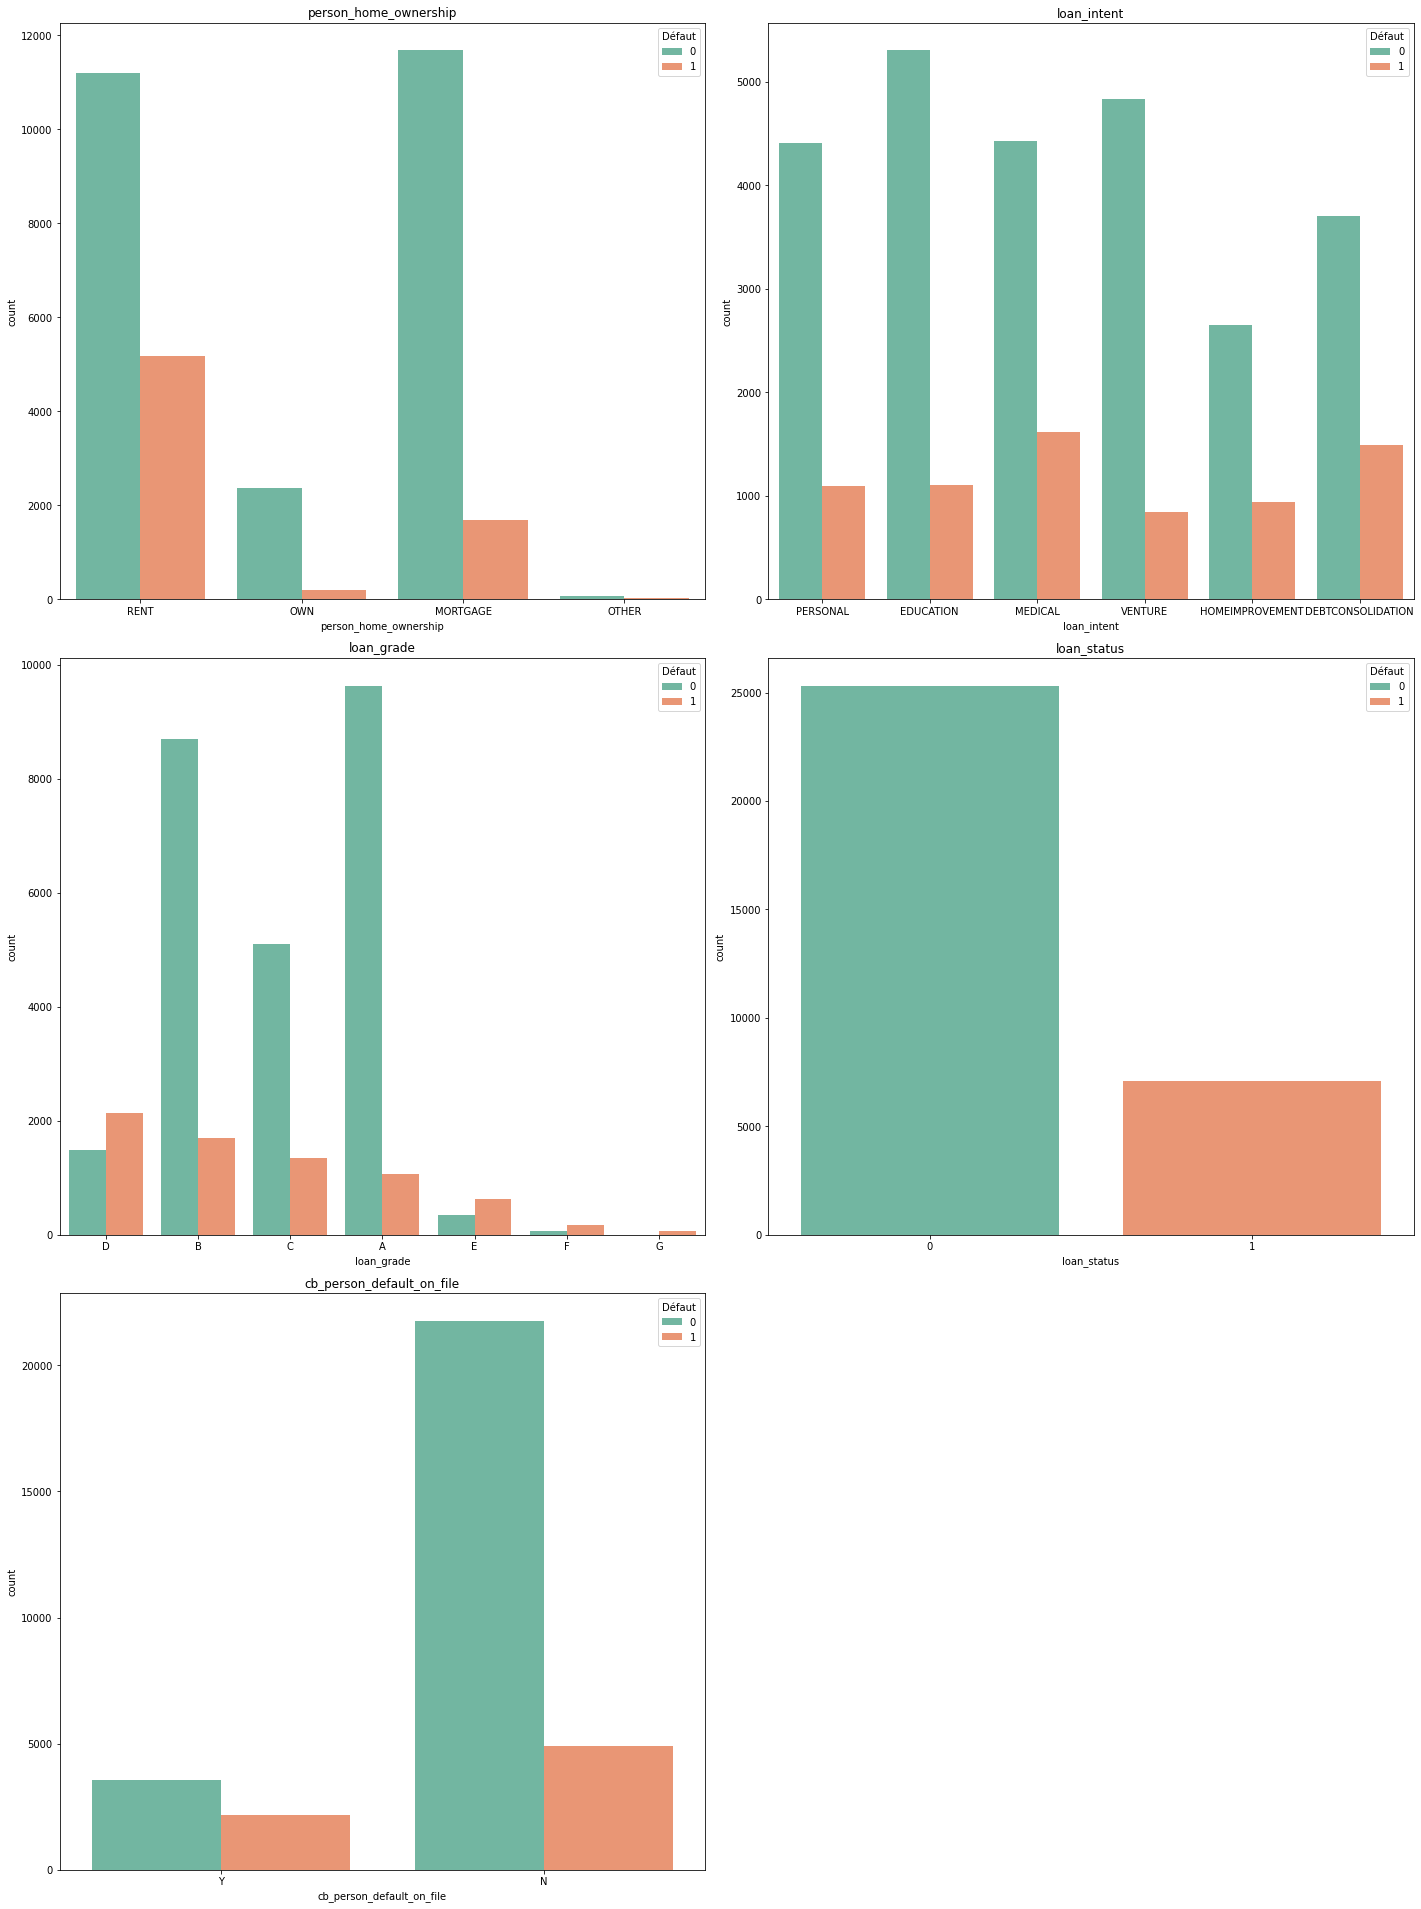

In [30]:
# Créer une figure
plt.figure(figsize=(20, 35))

# Créer des graphiques bivariés entre variables qualitatives et défaut
for i, var in enumerate(qual_var):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=df, x=var, hue='loan_status', palette='Set2')
    plt.title(var)
    plt.legend(title='Défaut')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [31]:
import numpy as np
from scipy.stats import chi2_contingency

# Calculer la statistique de test du khi-deux, la p-valeur et le V de Cramer pour chaque variable qualitative
stats = []
for var in qual_var:
    contingency_table = pd.crosstab(df[var], df['loan_status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    num_rows, num_cols = contingency_table.shape
    v_cramer = np.sqrt(chi2 / (df.shape[0] * min(num_rows - 1, num_cols - 1)))
    stats.append([var, chi2, p_value, v_cramer])

# Créer un dataframe pour les statistiques
stats_df = pd.DataFrame(stats, columns=['Variable', 'Chi-square', 'p-value', 'V Cramer'])
stats_df.sort_values('p-value', ascending=True, inplace=True)

# Afficher le tableau
print(stats_df)

                    Variable    Chi-square        p-value  V Cramer
0      person_home_ownership   1894.352673   0.000000e+00  0.241741
2                 loan_grade   5588.326419   0.000000e+00  0.415204
3                loan_status  32410.147647   0.000000e+00  0.999910
4  cb_person_default_on_file   1041.973789  1.351644e-228  0.179287
1                loan_intent    520.181380  3.512382e-110  0.126677


# Modélisation du modèle

In [32]:
from sklearn.preprocessing import StandardScaler

# Division de la base de données en train et en test
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [33]:
qual_var

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'loan_status',
 'cb_person_default_on_file']

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership_enc'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent_enc'] = le.fit_transform(df['loan_intent'])
df['loan_grade_enc'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file_enc'] = le.fit_transform(df['cb_person_default_on_file'])


In [35]:
qual_var_encoded = ['person_home_ownership_enc','loan_intent_enc','loan_grade_enc','cb_person_default_on_file_enc']

In [36]:
# 2. Créez une liste de correspondance entre variables originales et encodées
encodage_mapping = {
    'person_home_ownership': 'person_home_ownership_enc',
    'loan_intent': 'loan_intent_enc',
    'loan_grade': 'loan_grade_enc',
    'cb_person_default_on_file': 'cb_person_default_on_file_enc'
}

# 3. Créez un nouveau DataFrame
df_processed = df[quant_var].copy()  # Commencez avec les variables quantitatives

# 4. Ajoutez les variables encodées (remplacez les originales)
for original, encoded in encodage_mapping.items():
    df_processed[original] = df[encoded]  # Utilise le nom original mais avec les valeurs encodées

# 5. Si 'loan_status' est votre variable cible, assurez-vous de l'inclure
if 'loan_status' in df.columns:
    df_processed['loan_status'] = df['loan_status']

# Vérifiez le résultat
print(df_processed.head())
print(df_processed.dtypes)

   person_age  person_income  loan_amnt  loan_percent_income  \
0          22          59000      35000                 0.59   
1          21           9600       1000                 0.10   
2          25           9600       5500                 0.57   
3          23          65500      35000                 0.53   
4          24          54400      35000                 0.55   

   cb_person_cred_hist_length  person_emp_length  loan_int_rate  \
0                           3              123.0          16.02   
1                           2                5.0          11.14   
2                           3                1.0          12.87   
3                           2                4.0          15.23   
4                           4                8.0          14.27   

   person_home_ownership  loan_intent  loan_grade  cb_person_default_on_file  \
0                      3            4           3                          1   
1                      2            1           1   

In [37]:
df_processed

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_emp_length,loan_int_rate,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status
0,22,59000,35000,0.59,3,123.0,16.02,3,4,3,1,1
1,21,9600,1000,0.10,2,5.0,11.14,2,1,1,0,0
2,25,9600,5500,0.57,3,1.0,12.87,0,3,2,0,1
3,23,65500,35000,0.53,2,4.0,15.23,3,3,2,0,1
4,24,54400,35000,0.55,4,8.0,14.27,3,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,5800,0.11,30,1.0,13.16,0,4,2,0,0
32577,54,120000,17625,0.15,19,4.0,7.49,0,4,0,0,0
32578,65,76000,35000,0.46,28,3.0,10.99,3,2,1,0,1
32579,56,150000,15000,0.10,26,5.0,11.48,0,4,1,0,0


In [38]:
dtf_encoded= df_processed

In [39]:
X = dtf_encoded.drop('loan_status', axis=1)
y = dtf_encoded['loan_status']

In [40]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Sélectionner les variables quantitatives dans l'ensemble d'entraînement
dtf_train_quant = X_train[quant_var]

# Appliquer le StandardScaler sur les variables quantitatives de l'ensemble d'entraînement
scaler = StandardScaler()

dtf_train_quant_scaled = scaler.fit_transform(dtf_train_quant)


# Créer un DataFrame avec les variables quantitatives mises à l'échelle
X_train_scaled = pd.DataFrame(dtf_train_quant_scaled, columns=quant_var).reset_index(drop=True)

# Sélectionner les variables qualitatives dans l'ensemble d'entraînement
X_train_qual = X_train.drop(quant_var, axis=1).reset_index(drop=True)

# Concaténer les variables quantitatives mises à l'échelle avec les variables qualitatives de l'ensemble d'entraînement
X_train_encoded = pd.concat([X_train_scaled, X_train_qual], axis=1)
X_train_encoded

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_emp_length,loan_int_rate,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,-0.273931,-0.293748,-0.727713,-0.567080,-0.446608,-0.930932,-1.264674,3,1,0,0
1,0.824941,0.681568,2.252064,0.460259,-0.199916,0.559218,-0.253525,0,3,1,0
2,-0.430913,-0.169898,0.540277,0.647048,-0.446608,1.055934,-1.144377,3,2,0,0
3,2.394757,-0.092492,1.332771,1.207416,1.280235,-0.434215,-0.012930,0,5,1,0
4,-0.587894,-0.402117,-0.569215,-0.193502,-0.693300,-0.434215,-1.433741,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25927,1.295886,-0.371154,0.381778,1.114021,2.267002,2.794442,-0.012930,0,2,2,0
25928,-0.430913,0.046839,-0.172968,-0.473686,-0.446608,0.062501,-1.336202,3,2,0,0
25929,-0.273931,1.269855,1.649768,-0.286897,-0.693300,-0.930932,2.262970,3,0,4,0
25930,-0.273931,1.687847,0.857275,-0.753869,-0.693300,-1.179290,-0.012930,0,4,2,0


In [42]:
# Appliquer le StandardScaler sur les variables quantitatives de l'ensemble de test
dtf_test_quant_scaled = scaler.transform(X_test[quant_var])

# Créer un DataFrame avec les variables quantitatives mises à l'échelle de l'ensemble de test
X_test_scaled = pd.DataFrame(dtf_test_quant_scaled, columns=quant_var).reset_index(drop=True)
# Sélectionner les variables qualitatives dans l'ensemble d'entraînement
X_test_qual = X_test.drop(quant_var, axis=1).reset_index(drop=True)
# Concaténer les variables quantitatives mises à l'échelle avec les variables qualitatives de l'ensemble de test
X_test_encoded = pd.concat([X_test_scaled, X_test_qual], axis=1)
X_test_encoded

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_emp_length,loan_int_rate,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,0.510977,0.526756,0.064781,-0.660475,-0.199916,-0.682573,-0.825751,3,5,0,0
1,-1.058839,-0.444969,1.253521,2.795123,-0.939992,-0.434215,0.487768,3,3,1,0
2,-0.901858,-0.541448,-0.727713,-0.100108,-0.446608,-0.682573,-0.133227,3,3,1,0
3,-0.901858,-0.402117,0.381778,1.207416,-0.939992,-0.682573,-0.012930,3,0,1,0
4,-0.744876,0.867343,0.381778,-0.660475,-0.693300,0.062501,-1.215905,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6479,1.452867,0.650606,-0.252217,-0.940658,2.020310,2.794442,-0.185248,3,1,1,0
6480,1.138904,-0.686971,-1.123960,-0.473686,-0.199916,-0.930932,1.079502,3,4,2,1
6481,-0.744876,-0.631239,-0.648464,0.460259,-0.939992,-0.930932,-1.017576,3,1,0,0
6482,0.824941,-0.200861,0.064781,0.180076,0.786851,2.049367,1.602959,3,1,2,0


In [43]:
dtf_train = X_train_encoded
dtf_test = X_test_encoded

In [44]:
## Création du modèle
from sklearn.svm import SVC
# Créer un modèle SVM
svm_model = SVC()

# Entraîner le modèle SVM sur les données d'entraînement mises à l'échelle
svm_model.fit(dtf_train, y_train)

SVC()

# Modélisation

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [46]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=6))

In [47]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())


In [48]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [49]:
model1 = make_pipeline(SelectKBest(f_classif, k=6),RandomForestClassifier(random_state=0))
model2 =  RandomForestClassifier(random_state=0)

# Procédure d'évaluation

In [50]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [51]:
def evaluation(model):
    
    model.fit(dtf_train, y_train)
    ypred = model.predict(dtf_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, dtf_train, y_train,
                                              cv=5, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

RandomForest
[[4801  272]
 [ 583  828]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5073
           1       0.75      0.59      0.66      1411

    accuracy                           0.87      6484
   macro avg       0.82      0.77      0.79      6484
weighted avg       0.86      0.87      0.86      6484

AdaBoost


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[4869  204]
 [ 571  840]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5073
           1       0.80      0.60      0.68      1411

    accuracy                           0.88      6484
   macro avg       0.85      0.78      0.81      6484
weighted avg       0.88      0.88      0.87      6484



/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

SVM
[[4913  160]
 [ 585  826]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5073
           1       0.84      0.59      0.69      1411

    accuracy                           0.89      6484
   macro avg       0.87      0.78      0.81      6484
weighted avg       0.88      0.89      0.88      6484

KNN
[[4850  223]
 [ 599  812]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5073
           1       0.78      0.58      0.66      1411

    accuracy                           0.87      6484
   macro avg       0.84      0.77      0.79      6484
weighted avg       0.87      0.87      0.87      6484



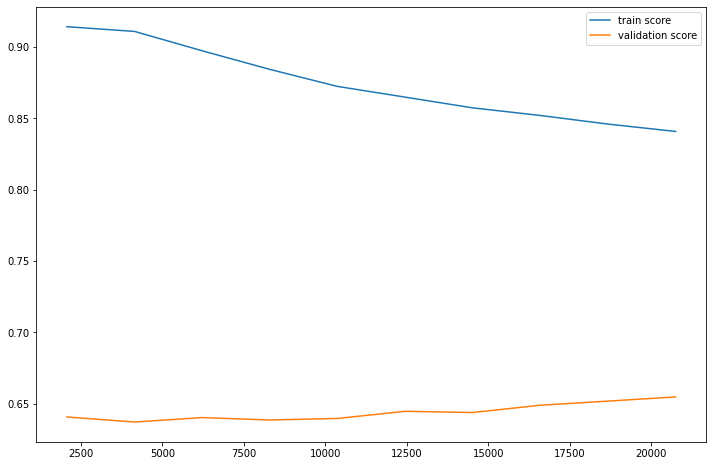

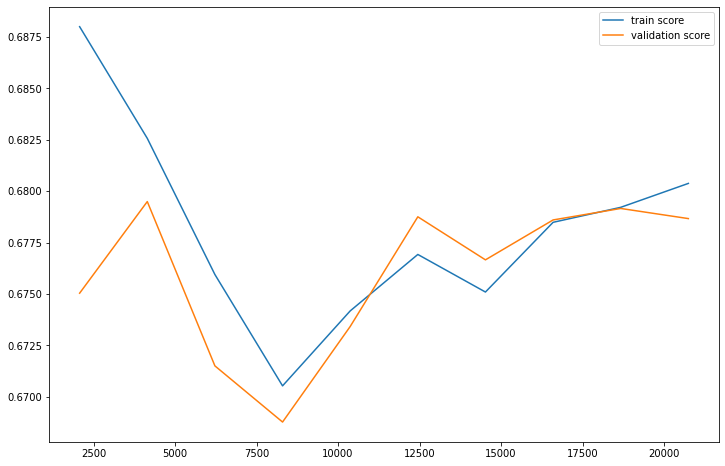

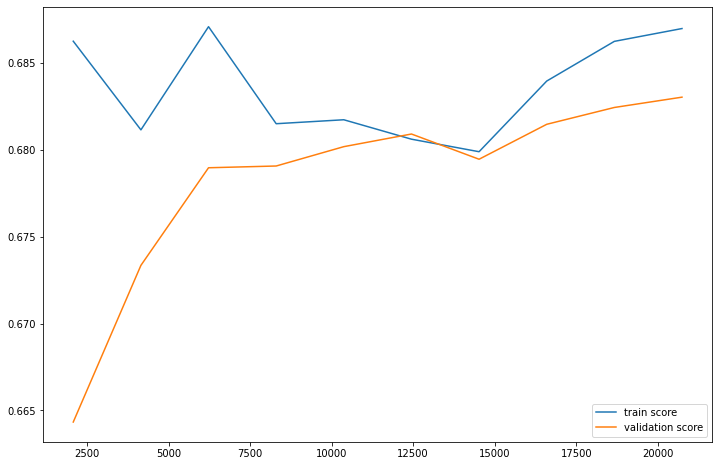

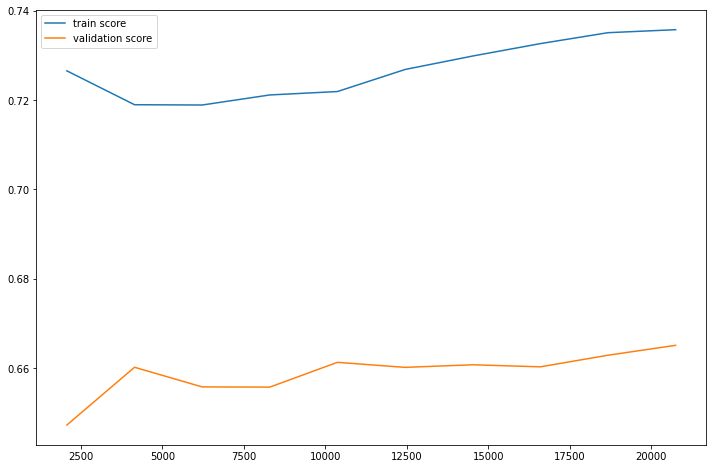

In [52]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

[[4876  197]
 [ 587  824]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      5073
           1       0.81      0.58      0.68      1411

    accuracy                           0.88      6484
   macro avg       0.85      0.77      0.80      6484
weighted avg       0.87      0.88      0.87      6484



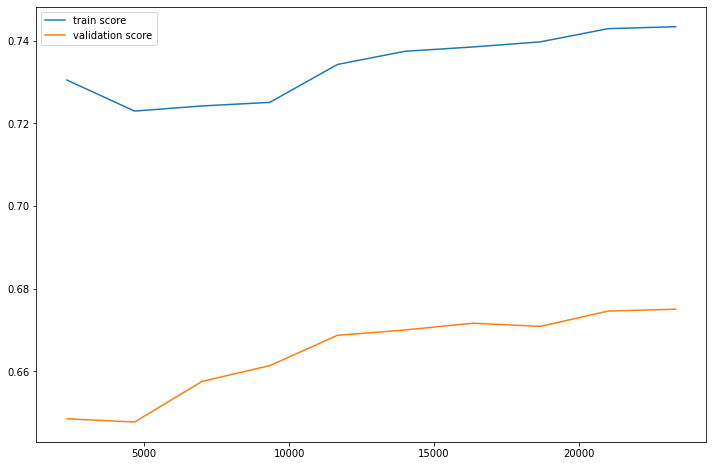

In [100]:
evaluation(model)

[[4892  181]
 [ 440  971]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5073
           1       0.84      0.69      0.76      1411

    accuracy                           0.90      6484
   macro avg       0.88      0.83      0.85      6484
weighted avg       0.90      0.90      0.90      6484



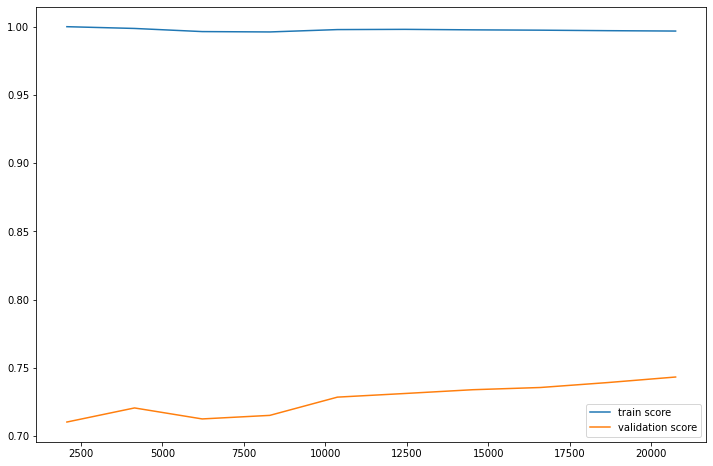

In [53]:
evaluation(model1)

Importance des variables :
                      Variable  Importance
0          loan_percent_income    0.225023
1                person_income    0.150690
2                   loan_grade    0.119737
3                loan_int_rate    0.103652
4        person_home_ownership    0.100877
5                    loan_amnt    0.075138
6                  loan_intent    0.073090
7            person_emp_length    0.062100
8                   person_age    0.043579
9   cb_person_cred_hist_length    0.035415
10   cb_person_default_on_file    0.010698



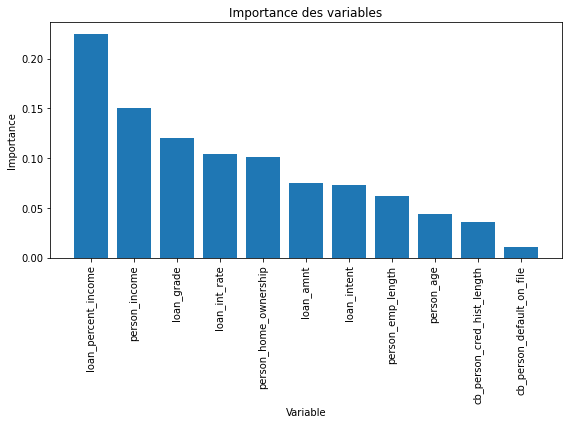

In [55]:

random_forest = RandomForestClassifier(oob_score=True)
random_forest.fit(X_train, y_train)
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

In [62]:
# Calculer le nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(X.shape[1]))

# Créer la forêt aléatoire avec les hyperparamètres fixés
random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42,oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(dtf_train, y_train)

RandomForestClassifier(max_features=3, oob_score=True, random_state=42)

In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(dtf_train)
y_test_pred = random_forest.predict(dtf_test)

In [64]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.932141
1       AUC                      1.0          0.851500
2    Recall                      1.0          0.708717


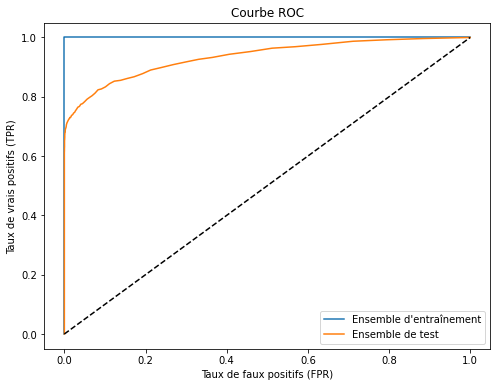

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(dtf_train)[:, 1]
y_test_prob = random_forest.predict_proba(dtf_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [1,2,3,4,6,7,8]
}

# Créer un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# Utiliser GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=10)
grid_search.fit(dtf_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'max_depth': 8, 'n_estimators': 200}


In [72]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
random_forest.fit(dtf_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, oob_score=True,
                       random_state=42)

In [73]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(dtf_train)
y_test_pred = random_forest.predict(dtf_test)

In [74]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                 0.926616          0.923812
1       AUC                 0.835909          0.831086
2    Recall                 0.674533          0.666903


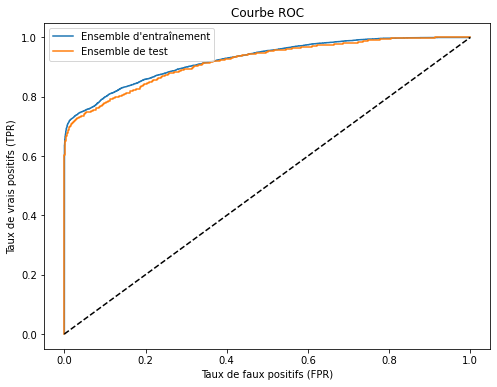

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(dtf_train)[:, 1]
y_test_prob = random_forest.predict_proba(dtf_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

[[5049   24]
 [ 470  941]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5073
           1       0.98      0.67      0.79      1411

    accuracy                           0.92      6484
   macro avg       0.94      0.83      0.87      6484
weighted avg       0.93      0.92      0.92      6484



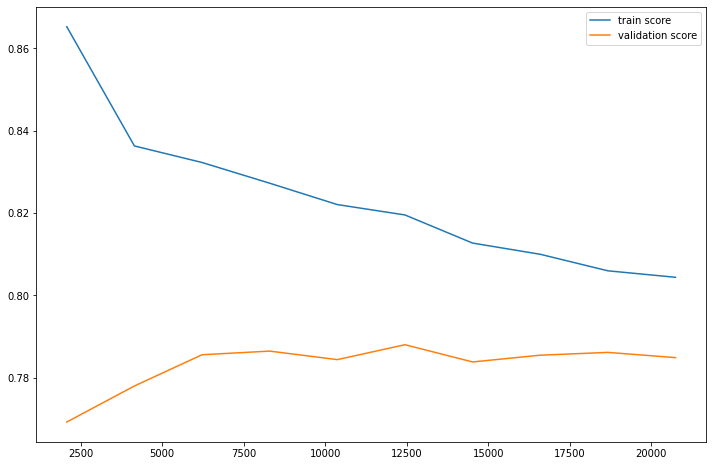

In [76]:
evaluation(random_forest)

In [83]:
pd.DataFrame(model2.feature_importances_, index=X_train.columns)

,0
mean,0.017885
std,0.011417
variance,0.013536
entropy,0.008440
entropylog,0.016312
entropyRatio,0.013767
fftPhaseEntropy,0.004476
fftPowerEntropy,0.000000
fftPhaseEntropylog,0.005576
fftPowerEntropylog,0.004837


<AxesSubplot:>

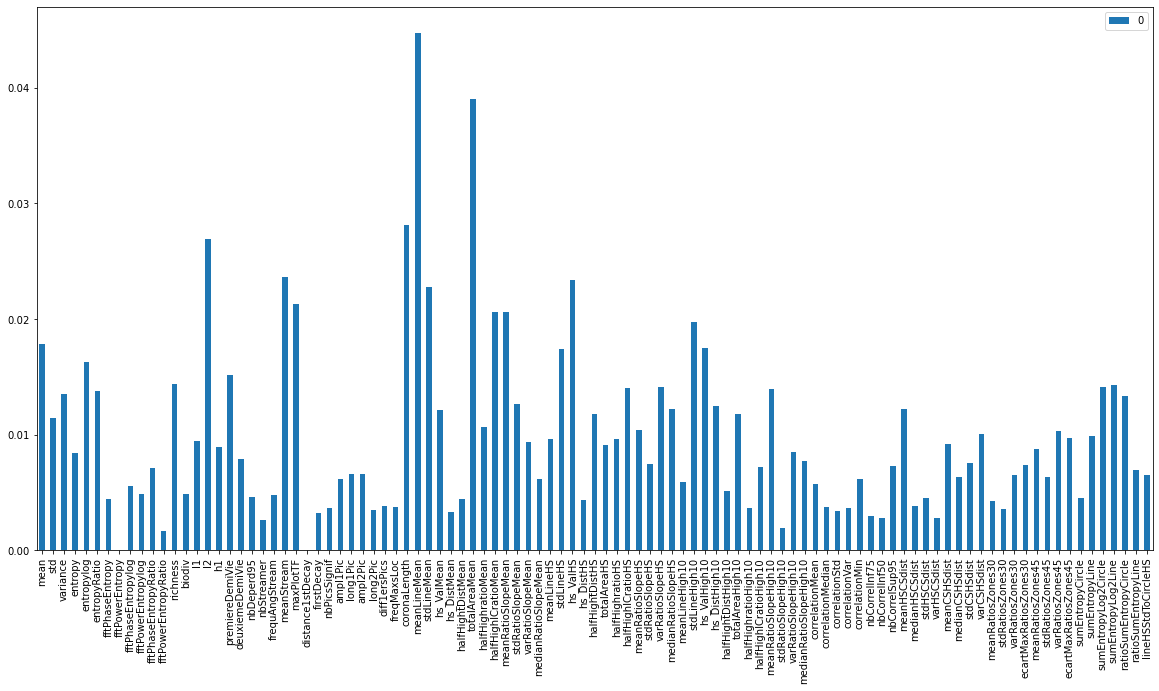

In [161]:

pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(20,10))

# OPTIMISATION 

In [103]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [104]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [107]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(5, 11)}

In [108]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=5,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 10, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5073
           1       0.84      0.50      0.63      1411

    accuracy                           0.87      6484
   macro avg       0.86      0.74      0.78      6484
weighted avg       0.87      0.87      0.86      6484



In [ ]:
evaluation(grid.best_estimator_)

[[4934  139]
 [ 698  713]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5073
           1       0.84      0.51      0.63      1411

    accuracy                           0.87      6484
   macro avg       0.86      0.74      0.78      6484
weighted avg       0.87      0.87      0.86      6484

